# Non-federated runs with convolutional neural networks

_21 August 2021_ <br />
_Chuan-Zheng Lee <czlee@stanford.edu>_ <br />
_Rough working_

The purpose of these plots is to figure out, in a non-federated setting, which models and optimizer parameters are sufficiently close to state-of-the-art to use for more ambitious experiments. This has all been done before, but doing it in this framework allows us to verify the code in this implementation, which doesn't necessarily reimplement everything in earlier such works.

In [1]:
from pathlib import Path

import matplotlib.pyplot as plt

from plots_utils import plot_averaged_training_charts, make_axes, show_timestamp_info

In [2]:
results_dir = Path("results/20210819-simple-cnns/")
show_timestamp_info(results_dir)

| experiments in this directory | started at | finished at | duration |
|--:|:-:|:-:|--:|
| first to start | **19 Aug 2021, 22:32:33** | 20 Aug 2021, 06:15:59 | 7 h 43 min 26 s |
| last to finish | 20 Aug 2021, 13:29:37 | **20 Aug 2021, 15:35:29** | 2 h 05 min 52 s |
| shortest | 20 Aug 2021, 08:23:02 | 20 Aug 2021, 08:43:14 | **20 min 11 s** |
| longest | 19 Aug 2021, 23:07:42 | 20 Aug 2021, 07:19:06 | **8 h 11 min 23 s** |


In [3]:
fixed_specs = {
    "epochs": 150,
    "batch_size": 64,
}
title_specs = {}
series_specs = {
    "learning_rate": '__all__',
    "momentum": '__all__',
    "weight_decay": '__all__',
}

# CIFAR-10

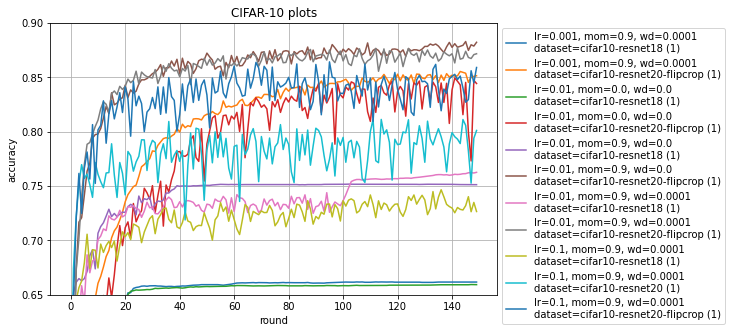

In [4]:
series_specs["dataset"] = [
    "cifar10-resnet18",
    "cifar10-resnet20",
    "cifar10-resnet18-flipcrop",
    "cifar10-resnet20-flipcrop",
]

plot_averaged_training_charts(results_dir, ['accuracy'], title_specs, fixed_specs, series_specs)
plt.title("CIFAR-10 plots")
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.ylim((0.65, 0.9))
plt.grid(True)

The top three lines are all `resnet20-flipcrop`. Weight decay doesn't seem to matter. Momentum does seem to matter, 0.9 is better than 0.0. A learning rate of 0.001 seems better.

# Fashion-MNIST

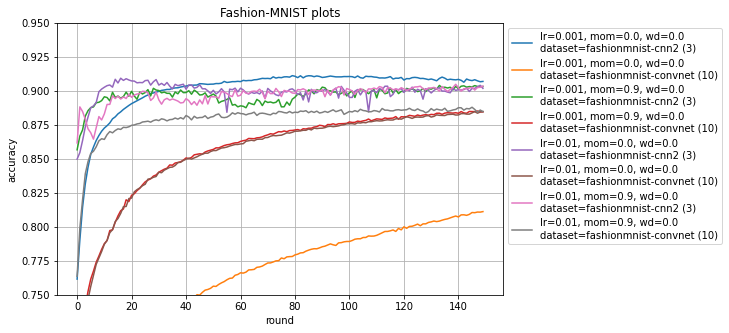

In [5]:
series_specs["dataset"] = [
    "fashionmnist-convnet",
    "fashionmnist-cnn1",
    "fashionmnist-cnn2",
]

plot_averaged_training_charts(results_dir, ['accuracy'], title_specs, fixed_specs, series_specs)
plt.title("Fashion-MNIST plots")
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.ylim((0.75, 0.95))
plt.grid(True)

`cnn2` is definitely better. The optimizer parameters don't seem to matter too much.